In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Sigmoid, Softmax

In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    ex = np.exp(x)
    return ex / np.sum(ex)

def activation(x, param):
    if param.lower() == 'sigmoid':
        return sigmoid(x)
    elif param.lower() == 'softmax':
        return softmax(x)
    else:
        print('activation function error : invalid param')
        return None

#### Shallow Neural Network

In [9]:
class ShallowNN:
    
    def __init__(self, num_n_input, num_n_hidden, num_n_output):
        self.W_h = np.zeros((num_n_hidden, num_n_input), dtype=np.float32)
        self.b_h = np.zeros((num_n_hidden, 1), dtype=np.float32)
        self.W_o = np.zeros((num_n_output, num_n_hidden), dtype=np.float32)
        self.b_o = np.zeros((num_n_output, 1), dtype=np.float32)
        
    def __call__(self, x):
        h = activation(np.matmul(self.W_h, x) + self.b_h, 'sigmoid')
        return activation(np.matmul(self.W_o, h) + self.b_o, 'softmax')

#### Load Dataset

In [10]:
dataset = np.load('./data/shallow-dataset.npz')
inputs = dataset['inputs']
labels = dataset['labels']

#### Create Model

In [11]:
num_input = 2
num_output = 10
model = ShallowNN(num_input, 128, num_output)

#### Load pre-trained parameters

In [12]:
weights = np.load('./data/shallow-parameters.npz')
model.W_h = weights['W_h']
model.b_h = weights['b_h']
model.W_o = weights['W_o']
model.b_o = weights['b_o']

#### Use Model

In [15]:
outputs = list()
for pt, label in zip(inputs, labels):
    output = model(pt)
    outputs.append(np.argmax(output))
    print('gt:{}, pred:{}'.format(label, np.argmax(output)))
outputs = np.stack(outputs, axis=0)

gt:0, pred:0
gt:0, pred:0
gt:0, pred:2
gt:0, pred:0
gt:0, pred:1
gt:0, pred:0
gt:0, pred:0
gt:0, pred:0
gt:0, pred:1
gt:0, pred:0
gt:0, pred:0
gt:0, pred:0
gt:0, pred:2
gt:0, pred:3
gt:0, pred:0
gt:0, pred:0
gt:0, pred:2
gt:0, pred:0
gt:0, pred:0
gt:0, pred:0
gt:0, pred:0
gt:0, pred:0
gt:0, pred:0
gt:0, pred:2
gt:0, pred:0
gt:0, pred:2
gt:0, pred:0
gt:0, pred:0
gt:0, pred:0
gt:0, pred:0
gt:0, pred:0
gt:0, pred:0
gt:0, pred:0
gt:0, pred:1
gt:0, pred:6
gt:0, pred:0
gt:0, pred:0
gt:0, pred:0
gt:0, pred:0
gt:0, pred:0
gt:0, pred:6
gt:0, pred:0
gt:0, pred:0
gt:0, pred:0
gt:0, pred:3
gt:0, pred:0
gt:0, pred:0
gt:0, pred:0
gt:0, pred:3
gt:0, pred:0
gt:0, pred:0
gt:0, pred:0
gt:0, pred:0
gt:0, pred:0
gt:0, pred:0
gt:0, pred:6
gt:0, pred:0
gt:0, pred:0
gt:0, pred:0
gt:0, pred:0
gt:0, pred:0
gt:0, pred:0
gt:0, pred:0
gt:0, pred:0
gt:0, pred:9
gt:0, pred:0
gt:0, pred:2
gt:0, pred:6
gt:0, pred:0
gt:0, pred:0
gt:0, pred:0
gt:0, pred:0
gt:0, pred:3
gt:0, pred:0
gt:0, pred:0
gt:0, pred:2
gt:0, pred:0

Text(0.5, 1.0, 'Ground truth')

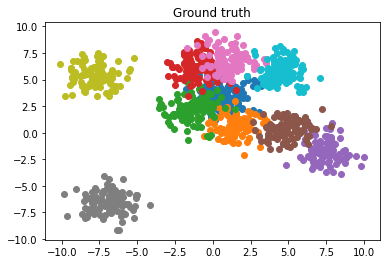

In [16]:
plt.figure()
for i in range(10):
    mask = labels == i
    plt.scatter(inputs[mask, 0], inputs[mask, 1])
plt.title('Ground truth')

Text(0.5, 1.0, 'Model prediction')

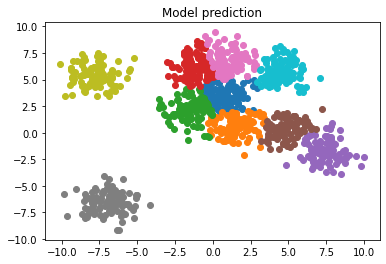

In [18]:
plt.figure()
for i in range(10):
    mask = outputs == i
    plt.scatter(inputs[mask, 0], inputs[mask, 1])
plt.title('Model prediction')